Zad.1

* $P(C=T|R=T, S=T, W=T)$ = $P(C=T|R=T, S=T)$ = $\frac{P(R=T|C=T)P(S=T|C=T)P(C=T)}{P(R=T|C=T)P(S=T|C=T)P(C=T) + P(R=T|C=F)P(S=T|C=F)P(C=F)}$ = $\frac{0.8*0.1*0.5}{0.8*0.1*0.5+0.2*0.5*0.5}$ = $0.(44)$


* $P(C=T|R=F, S=T, W=T)$ = $P(C=T|R=F, S=T)$ = $\frac{P(R=F|C=T)P(S=T|C=T)P(C=T)}{P(R=F|C=T)P(S=T|C=T)P(C=T) + P((R=F|C=F)P(S=T|C=F)P(C=F)}$ = $\frac{0.2*0.1*0.5}{0.2*0.1*0.5 + 0.8*0.5*0.5}$ = $0.0476$


* $P(R=T)|C=T, S=T, W=T)$ = $\frac{P(R=T|C=T)P(W=T|S=T, R=T)}{P(R=T|C=T)P(W=T|S=T, R=T) + P(R=F|C=T)P(W=T|S=T, R=F)}$ = $\frac{0.8*0.99}{0.8*0.99 + 0.2*0.9}$ = $0.8148$

* $P(R=T)|C=F, S=T, W=T)$ = $\frac{P(R=T|C=F)P(W=T|S=T, R=T)}{P(R=T|C=F)P(W=T|S=T, R=T) + P(R=F|C=F)P(W=T|S=T, R=F)}$ = $\frac{0.2*0.99}{0.2*0.99 + 0.8*0.9}$ = $0.2157$

Zad.2

In [633]:
import numpy as np
from scipy.stats import binom, gamma, beta
import random

np.random.seed(1234)

probs = {'C':{1:0.4444, 0:0.0476}, 'R':{1:0.8148, 0:0.2157}}  #probabilities computed above
                                                              #instance: probs['C'][1] = P(C=True|R=True(=1), S=True, W=True)
def Gibbs_sampler(n, R, C):                                
  values = {'R':R, 'C':C}
  samples = {'R':[], 'C':[]}
  swap = {'R':'C', 'C':'R'}

  for _ in range(n):
    choice = random.choice(['R', 'C'])  
    weight = probs[choice][values[swap[choice]]]

    prob = random.choices((0, 1), weights = (1-weight, weight))[0]

    values[choice] = prob

    samples[choice].append(values[choice])
    samples[swap[choice]].append(values[swap[choice]])
  
  return samples

In [634]:
samples = Gibbs_sampler(100, 1, 1)

Zad.3

In [635]:
print('Estimated P(R = T | S = T, W = T) = ', np.mean(samples['R']))

Estimated P(R = T | S = T, W = T) =  0.35


Zad.4

In [636]:
samples1 = Gibbs_sampler(50_000, 1, 1)
samples2 = Gibbs_sampler(50_000, 1, 1)

Zad.5

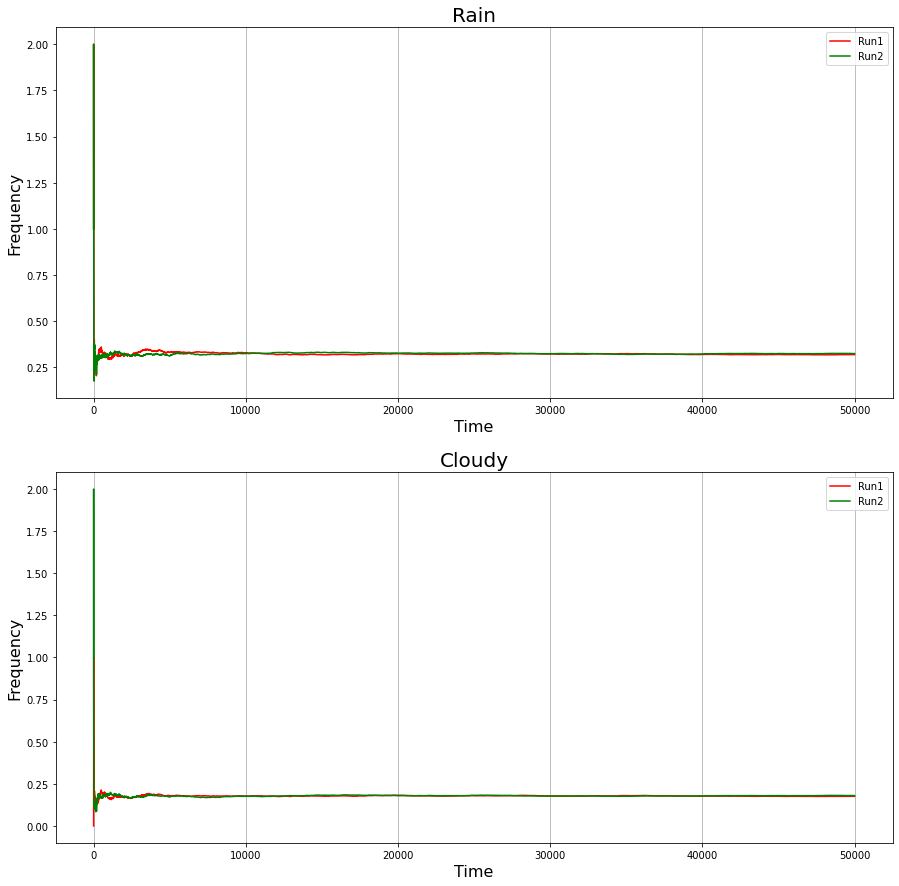

In [637]:
from numpy.random.mtrand import sample
import matplotlib.pyplot as plt

def frequency(samples):
  x = [i for i in range(len(samples['R']))]
  x[0] = 1
  Rf = np.divide(np.cumsum(samples['R']), x)
  Cf = np.divide(np.cumsum(samples['C']), x)

  return Rf, Cf

Rf1, Cf1 = frequency(samples1)
Rf2, Cf2 = frequency(samples2)

fig, axes = plt.subplots(2, 1, figsize = (15, 15))

x = [i for i in range(50_000)]

axes[0].set_title('Rain', fontsize = 20)
axes[1].set_title('Cloudy', fontsize = 20)

axes[0].plot(x, Rf1, 'r', label = "Run1");
axes[0].plot(x, Rf2, 'g', label = "Run2");
axes[1].plot(x, Cf1, 'r', label = "Run1");
axes[1].plot(x, Cf2, 'g', label = "Run2");
label_setter = np.vectorize(lambda ax: [ax.set_xlabel('Time', fontsize=16), 
                                   ax.set_ylabel('Frequency', fontsize=16)])
label_setter(axes)
axes[0].legend();
axes[1].legend();
axes[0].grid(axis = 'x');
axes[1].grid(axis = 'x')

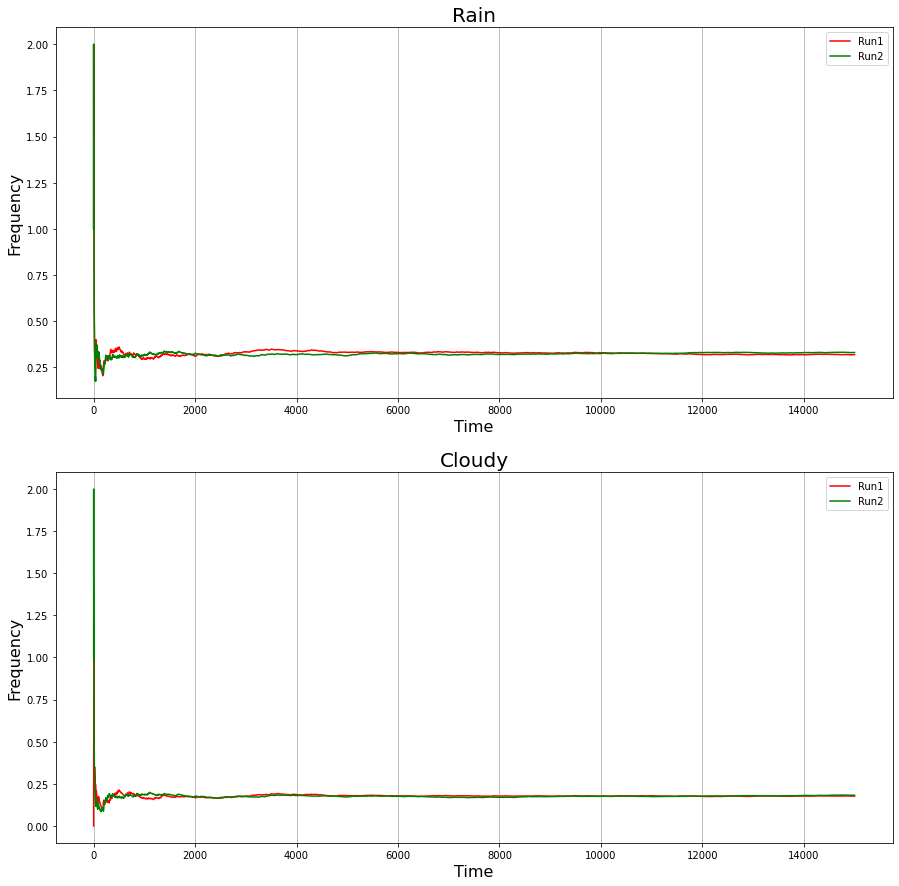

In [638]:
fig, axes = plt.subplots(2, 1, figsize = (15, 15))

x = [i for i in range(50_000)]

axes[0].set_title('Rain', fontsize = 20)
axes[1].set_title('Cloudy', fontsize = 20)

axes[0].plot(x[:15000], Rf1[:15000], 'r', label = "Run1");
axes[0].plot(x[:15000], Rf2[:15000], 'g', label = "Run2");
axes[1].plot(x[:15000], Cf1[:15000], 'r', label = "Run1");
axes[1].plot(x[:15000], Cf2[:15000], 'g', label = "Run2");
label_setter = np.vectorize(lambda ax: [ax.set_xlabel('Time', fontsize=16), 
                                   ax.set_ylabel('Frequency', fontsize=16)])
label_setter(axes)
axes[0].legend();
axes[1].legend();
axes[0].grid(axis = 'x');
axes[1].grid(axis = 'x')

Suggested burn-in time based on plots above is 8000. Plot seems to stabilize from this point.

Zad.6

RAIN


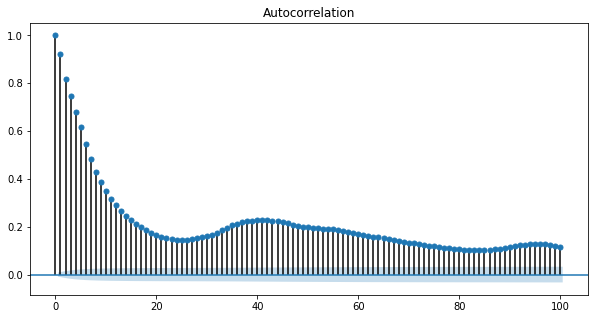

In [645]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams['figure.figsize'] = [10, 5]


print('RAIN')
plot_acf(Rf1, lags = 100)
plt.show()

CLOUDY


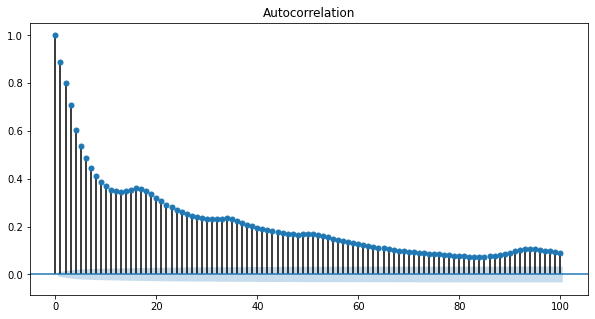

In [646]:
print('CLOUDY')
plot_acf(Cf1, lags = 100)
plt.show()

Suggested interval for drawing approximately independent samples is 90.

Zad.7

In [641]:
def burn_in(samples, b):
  samples = samples.copy()
  samples['R'] = samples['R'][b:]
  samples['C'] = samples['C'][b:]
  return samples

def thinning_out(samples, t):
  if t==0: t=1
  samples = samples.copy()
  samples['R'] = samples['R'][::t]
  samples['C'] = samples['C'][::t]
  return samples

Zad.8

In [647]:
updated_samples1 = burn_in(samples1, 8000)
updated_samples1 = thinning_out(updated_samples1, 90)

In [652]:
print('Estimated P(R = T | S = T, W = T) in task 3 was equal to: ', np.mean(samples['R']))
print('Estimated P(R = T | S = T, W = T) after burn-in and thinning-out: ', np.mean(updated_samples1['R']))
print('Estimated P(R = T | S = T, W = T) while using 50,000 samples: ', np.mean(samples1['R']))

Estimated P(R = T | S = T, W = T) in task 3 was equal to:  0.35
Estimated P(R = T | S = T, W = T) after burn-in and thinning-out:  0.32548179871520344
Estimated P(R = T | S = T, W = T) while using 50,000 samples:  0.3188


After burn-in and thinning-out the value is smaller than in task 3 and a little bit larger than the value from 50 000 samples.

Zad.9

$P(R=T|S=T, W=T)$ = $\frac{P(R=T|C=T, W=T, S=T)*P(R=T|C=F, W=T, S=T)}{P(R=T|C=T, W=T, S=T)*P(R=T|C=F, W=T, S=T)+P(R=F|C=T, W=T, S=T)*P(R=F|C=F, W=T, S=T)}$ = $\frac{0.8*0.99*0.1*0.5 + 0.2*0.99*0.5*0.5}{0.8*0.99*0.1*0.5 + 0.2*0.99*0.5*0.5 + 0.2*0.5*0.99*0.1 + 0.8*0.5*0.9*0.5}$ = $\frac{0.0396+0.0495}{0.0396+0.0495+0.0099+0.18}$ = $\frac{0.0891}{0.279}$ = $0.3194$


Probability P(R = T | S = T, W = T) computed analytically (0.3194) is close to the sampling estimate (0.3255).

Bonus

In [816]:
samples3 = Gibbs_sampler(50_000, 1, 1)
samples3 = burn_in(samples3, 8000)
samples3 = thinning_out(samples3, 90)

samples4 = Gibbs_sampler(50_000, 1, 1)
samples4 = burn_in(samples4, 8000)
samples4 = thinning_out(samples4, 90)

# samples3, samples4

In [817]:
Rf3, Cf3 = frequency(samples3)
Rf4, Cf4 = frequency(samples4)

In [820]:
#RAIN
L = len(Rf3)
chain_mean1 = np.mean(Rf3)
chain_mean2 = np.mean(Rf4)
grand_mean = (chain_mean1 + chain_mean2)/2
B = L*((chain_mean1 - grand_mean)**2 + (chain_mean2 - grand_mean)**2)
S1 = np.var(Rf3)
S2 = np.var(Rf4)
W = (1/2)*(S1 + S2)
R = (((L-1)/L)*W + (1/L)*B)/W
print('R for Rain: ', R)

R for Rain:  1.0285884368294196


There's no convergence

In [821]:
#CLOUDY
L = len(Cf3)
chain_mean1 = np.mean(Cf3)
chain_mean2 = np.mean(Cf4)
grand_mean = (chain_mean1 + chain_mean2)/2
B = L*((chain_mean1 - grand_mean)**2 + (chain_mean2 - grand_mean)**2)
S1 = np.var(Cf3)
S2 = np.var(Cf4)
W = (1/2)*(S1 + S2)
R = (((L-1)/L)*W + (1/L)*B)/W
print('R for Cloudy: ', R)

R for Cloudy:  1.0030481049560183


There is convergence

The formula was based on information from website https://bookdown.org/rdpeng/advstatcomp/monitoring-convergence.html#gelman-rubin-statistic